<a href="https://colab.research.google.com/github/zafe312/car_recommender/blob/main/car_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI clustering to recommend cars based on user input


1.   Create dataset
2.   Test out different classifiers



## Create random dataset

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Features of each datapoint
columns = ['id', 'Listed Name', 'Condition', 'Make', 'Model', 'Body', 'Mileage', 'Month', 'Year', 'Price', 'Length', 'Width', 'Height', 'Ground clearance', 'Seats', 
           'Global NCAP', 'Fuel type', 'Engine', 'Displacement', 'Cylinder', 'Transmission', 'Drive', 'Exterior Color', 'Interior Color', 'Unladen weight', 
           'Gross vehicle weight', 'Location', 'Latitude', 'Longitude']

In [3]:
id = [1000 + i for i in range(1,500)]
Condition = ['New', 'Used', 'Certified']
Make = ['Hyundai', 'Tata', 'Mahindra', 'Nissan', 'Toyota', 'Kia', 'Ford', 'Chevrolet', 'Honda', 'Maruti Suzuki', 'Renault']
Model = ['A','B','C']
Body = ['Hatchback', 'SUV', 'CUV', 'MUV', 'Sedan', 'Minivan', 'Convertible', 'Coupe', 'Off-road']
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Year = [2005 + i for i in range(18)]
price_min = 300000
price_max = 2200000
Seats = [5,6,7,8,10]
Ncap = [0,1,2,3,4,5]
Fuel = ['Petrol', 'Diesel', 'Electric', 'Hybrid']
Cylinder = [3,4,5]
Transmission = ['Automatic', 'Semi-automatic', 'Manual']
Drive = ['FWD', 'BWD', '4WD']
Ext_color = ['White', 'Red', 'Black', 'Brown', 'Silver', 'Green', 'Biege']
Int_color = ['Grey', 'Silver', 'Brown', 'Red']

In [4]:
# Create DataFrame
df = pd.DataFrame(columns=columns)

# Generate random data 
for i in id:
  condition = random.choice(Condition)
  make = random.choice(Make)
  model = random.choice(Model)
  year = random.choice(Year)
  listed_name = f'{condition} {year} {make} {model}'
  body = random.choice(Body)
  mileage = random.randint(2000,100000)
  month = random.choice(Month)
  price = random.randint(price_min,price_max)
  length = random.randint(1000,1500)
  width = random.randint(800,1000)
  height = random.randint(600,1000)
  gd_clearance = random.randint(100,200)
  seats = random.choice(Seats)
  ncap = random.choice(Ncap)
  fuel = random.choice(Fuel)
  engine = random.randint(1,10)
  displacement = random.randint(1000,1500)
  cylinder = random.choice(Cylinder)
  transmission = random.choice(Transmission)
  drive = random.choice(Drive)
  ext_color = random.choice(Ext_color)
  int_color = random.choice(Int_color)
  un_weight = random.randint(1000,2000)
  gross_weight = un_weight + random.randint(50, 100)
  location = random.randint(183773,799382)
  lat = random.uniform(80,127)
  lon = random.uniform(68,97)


  car = [i, listed_name, condition, make, model, body, mileage, month, year, price, length, width, height, 
         gd_clearance, seats, ncap, fuel, engine, displacement, cylinder, transmission, drive, ext_color, 
         int_color, un_weight, gross_weight, location, lat, lon]
  df = pd.DataFrame(np.insert(df.values, len(df.index), values=car, axis=0))

df.columns = columns
df = df.set_index('id')
df.head()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,New 2009 Tata B,New,Tata,B,Hatchback,89768,Aug,2009,653596,1261,833,664,186,8,3,Diesel,10,1064,3,Manual,BWD,Black,Brown,1244,1333,274865,88.0929,69.4167
1002,Used 2017 Hyundai A,Used,Hyundai,A,Coupe,50168,Mar,2017,2158378,1220,898,839,142,5,3,Electric,1,1413,3,Semi-automatic,BWD,White,Silver,1576,1643,435795,105.108,71.0627
1003,Certified 2013 Tata A,Certified,Tata,A,MUV,43822,Oct,2013,1999692,1207,811,977,198,10,2,Hybrid,4,1321,4,Automatic,BWD,Biege,Silver,1038,1138,483190,86.472,92.3107
1004,Certified 2015 Hyundai A,Certified,Hyundai,A,CUV,95787,Mar,2015,1297445,1050,813,893,182,8,3,Petrol,8,1285,3,Manual,FWD,Green,Red,1298,1362,662551,120.627,94.3671
1005,Certified 2010 Tata B,Certified,Tata,B,Off-road,12935,Mar,2010,1884984,1150,851,632,107,8,0,Diesel,7,1318,3,Manual,FWD,Black,Red,1214,1312,382139,88.0878,90.8007


## Visualization

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df.describe()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
count,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499.000000,499.000000
unique,442,3,11,3,9,498,12,18,499,307,186,280,101,5,6,4,10,321,3,3,3,7,4,394,389,499,499.000000,499.000000
top,Certified 2007 Honda C,New,Kia,B,Off-road,9732,Jan,2019,2140356,1103,859,877,197,5,3,Hybrid,1,1438,4,Manual,4WD,Green,Brown,1180,1786,578559,112.764412,77.368114
freq,3,184,54,179,65,2,56,43,1,6,8,5,10,117,93,137,61,5,171,171,176,86,141,4,4,1,1.000000,1.000000


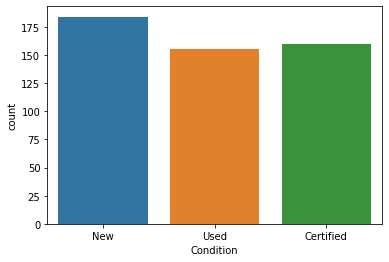

In [7]:
sns.countplot(x = df['Condition'])
plt.show()

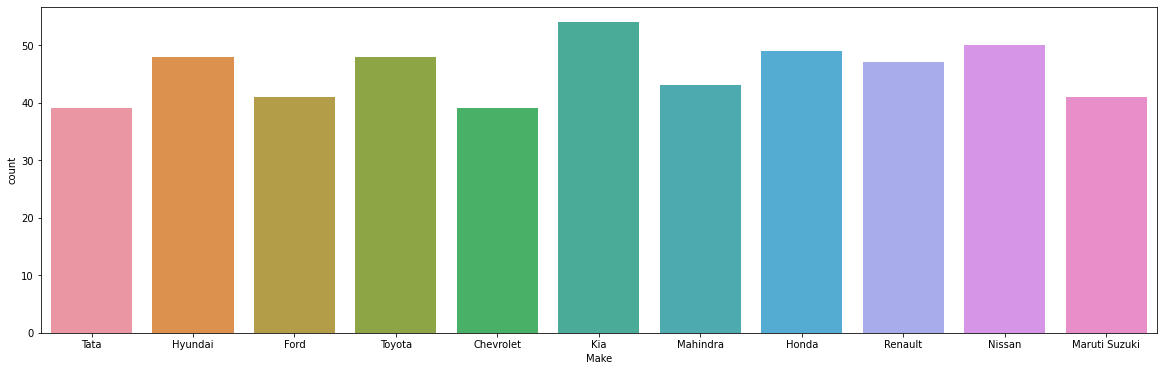

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['Make'])
plt.show()

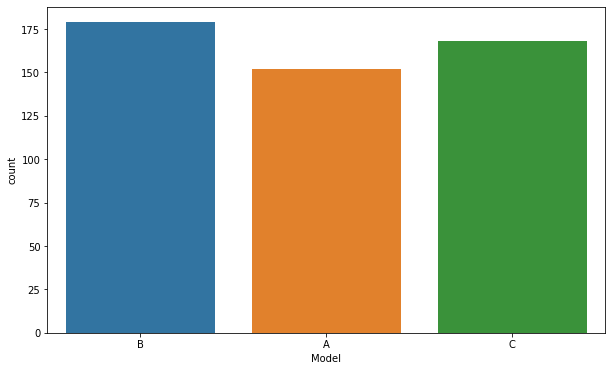

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Model'])
plt.show()

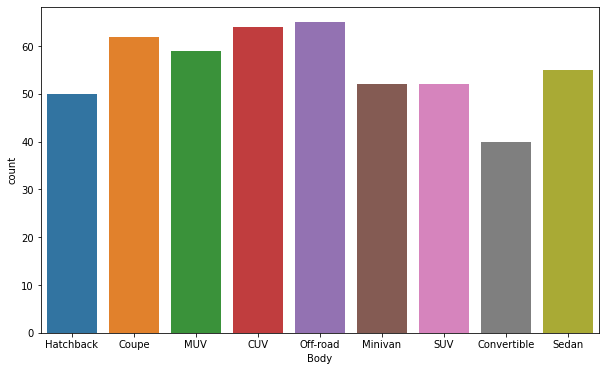

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Body'])
plt.show()

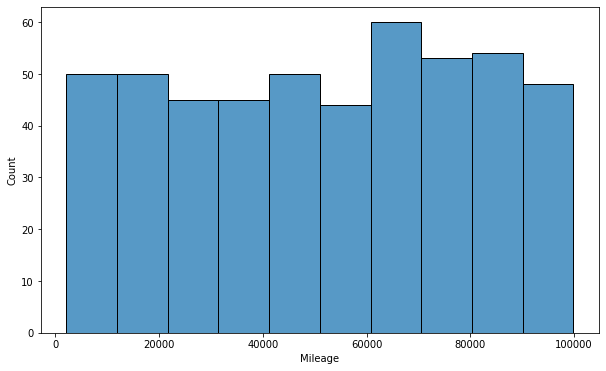

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Mileage'])
plt.show()

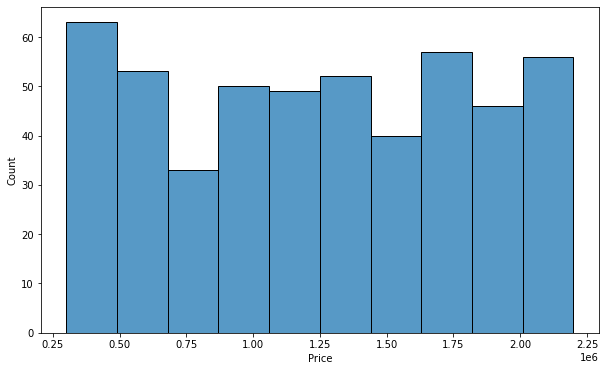

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Price'])
plt.show()

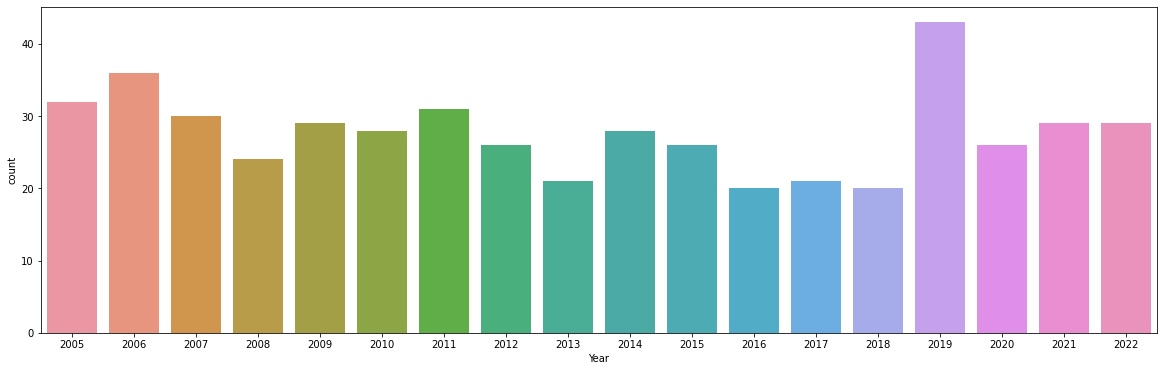

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['Year'])
plt.show()

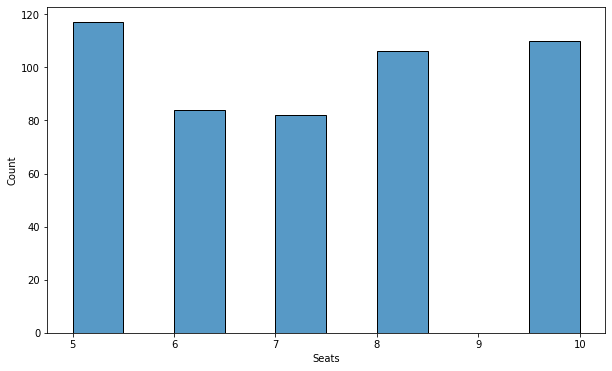

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Seats'])
plt.show()

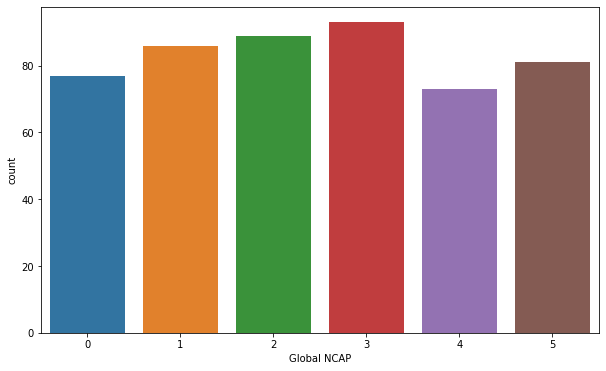

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Global NCAP'])
plt.show()

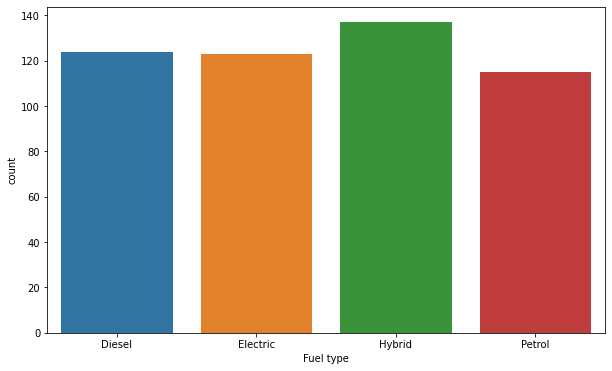

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Fuel type'])
plt.show()

## Feature Engineering

In [24]:
# Make a copy of the data
df1 = df.copy(deep=True)
df1.head()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,New 2009 Tata B,New,Tata,B,Hatchback,89768,Aug,2009,653596,1261,833,664,186,8,3,Diesel,10,1064,3,Manual,BWD,Black,Brown,1244,1333,274865,88.0929,69.4167
1002,Used 2017 Hyundai A,Used,Hyundai,A,Coupe,50168,Mar,2017,2158378,1220,898,839,142,5,3,Electric,1,1413,3,Semi-automatic,BWD,White,Silver,1576,1643,435795,105.108,71.0627
1003,Certified 2013 Tata A,Certified,Tata,A,MUV,43822,Oct,2013,1999692,1207,811,977,198,10,2,Hybrid,4,1321,4,Automatic,BWD,Biege,Silver,1038,1138,483190,86.472,92.3107
1004,Certified 2015 Hyundai A,Certified,Hyundai,A,CUV,95787,Mar,2015,1297445,1050,813,893,182,8,3,Petrol,8,1285,3,Manual,FWD,Green,Red,1298,1362,662551,120.627,94.3671
1005,Certified 2010 Tata B,Certified,Tata,B,Off-road,12935,Mar,2010,1884984,1150,851,632,107,8,0,Diesel,7,1318,3,Manual,FWD,Black,Red,1214,1312,382139,88.0878,90.8007


In [35]:
# Convert to lower case
for i in ['Condition', 'Make', 'Model', 'Body', 'Month', 'Fuel type', 'Transmission', 'Drive', 'Exterior Color', 'Interior Color']:
  df1[i] = df1[i].str.lower()

df1.head()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,New 2009 Tata B,new,tata,b,hatchback,89768,aug,2009,653596,1261,833,664,186,8,3,diesel,10,1064,3,manual,bwd,black,brown,1244,1333,274865,88.0929,69.4167
1002,Used 2017 Hyundai A,used,hyundai,a,coupe,50168,mar,2017,2158378,1220,898,839,142,5,3,electric,1,1413,3,semi-automatic,bwd,white,silver,1576,1643,435795,105.108,71.0627
1003,Certified 2013 Tata A,certified,tata,a,muv,43822,oct,2013,1999692,1207,811,977,198,10,2,hybrid,4,1321,4,automatic,bwd,biege,silver,1038,1138,483190,86.472,92.3107
1004,Certified 2015 Hyundai A,certified,hyundai,a,cuv,95787,mar,2015,1297445,1050,813,893,182,8,3,petrol,8,1285,3,manual,fwd,green,red,1298,1362,662551,120.627,94.3671
1005,Certified 2010 Tata B,certified,tata,b,off-road,12935,mar,2010,1884984,1150,851,632,107,8,0,diesel,7,1318,3,manual,fwd,black,red,1214,1312,382139,88.0878,90.8007


In [39]:
print(df1.columns)

Index(['Listed Name', 'Condition', 'Make', 'Model', 'Body', 'Mileage', 'Month',
       'Year', 'Price', 'Length', 'Width', 'Height', 'Ground clearance',
       'Seats', 'Global NCAP', 'Fuel type', 'Engine', 'Displacement',
       'Cylinder', 'Transmission', 'Drive', 'Exterior Color', 'Interior Color',
       'Unladen weight', 'Gross vehicle weight', 'Location', 'Latitude',
       'Longitude'],
      dtype='object')


In [76]:
# Extract tokens for suitable features from the data
columns = list(df1.columns)

Condition = list(set(df1['Condition']))
Make = list(set(df1['Make']))
Model = list(set(df1['Model']))
Body = list(set(df1['Body']))
Month = list(set(df1['Month']))
Fuel_type = list(set(df1['Fuel type']))
Transmission = list(set(df1['Transmission']))
Drive = list(set(df1['Drive']))
Ext_color = list(set(df1['Exterior Color']))
Int_color = list(set(df1['Interior Color']))

In [78]:
df2 = df1.copy(deep=True)
df2.rename(columns = {'Fuel type':'Fuel_type'}, inplace = True)
df2.rename(columns = {'Exterior Color':'Exterior_color'}, inplace = True)
df2.rename(columns = {'Interior Color':'Interior_color'}, inplace = True)


# Features to be tokenized
tokenized_features = ['Condition', 'Make', 'Model', 'Body', 'Month', 'Fuel_type', 'Transmission', 'Drive', 'Exterior_color', 'Interior_color']

# Vectorize Condition column
df2 = df2.assign(new=lambda x: 1*(x.Condition == 'new'))
df2 = df2.assign(used=lambda x: 1*(x.Condition == 'used'))
df2 = df2.assign(certified=lambda x: 1*(x.Condition == 'certified'))

# Vectorize Make column
df2 = df2.assign(kia=lambda x: 1*(x.Make == 'kia'))
df2 = df2.assign(nissan=lambda x: 1*(x.Make == 'nissan'))
df2 = df2.assign(honda=lambda x: 1*(x.Make == 'honda'))
df2 = df2.assign(maruti=lambda x: 1*(x.Make == 'maruti suzuki'))
df2 = df2.assign(chevrolet=lambda x: 1*(x.Make == 'chevrolet'))
df2 = df2.assign(ford=lambda x: 1*(x.Make == 'ford'))
df2 = df2.assign(hyundai=lambda x: 1*(x.Make == 'hyundai'))
df2 = df2.assign(renault=lambda x: 1*(x.Make == 'renault'))
df2 = df2.assign(mahindra=lambda x: 1*(x.Make == 'mahindra'))
df2 = df2.assign(toyota=lambda x: 1*(x.Make == 'toyota'))
df2 = df2.assign(tata=lambda x: 1*(x.Make == 'tata'))

# Vectorize Model column
df2 = df2.assign(a=lambda x: 1*(x.Model == 'a'))
df2 = df2.assign(b=lambda x: 1*(x.Model == 'b'))
df2 = df2.assign(c=lambda x: 1*(x.Model == 'c'))

# Vectorize Body column
df2 = df2.assign(muv=lambda x: 1*(x.Body == 'muv'))
df2 = df2.assign(convertible=lambda x: 1*(x.Body == 'convertible'))
df2 = df2.assign(minivan=lambda x: 1*(x.Body == 'minivan'))
df2 = df2.assign(cuv=lambda x: 1*(x.Body == 'cuv'))
df2 = df2.assign(hatchback=lambda x: 1*(x.Body == 'hatchback'))
df2 = df2.assign(suv=lambda x: 1*(x.Body == 'suv'))
df2 = df2.assign(sedan=lambda x: 1*(x.Body == 'sedan'))
df2 = df2.assign(coupe=lambda x: 1*(x.Body == 'coupe'))
df2 = df2.assign(off_road=lambda x: 1*(x.Body == 'off-road'))

# Vectorize Month column
df2 = df2.assign(jan=lambda x: 1*(x.Month == 'jan'))
df2 = df2.assign(feb=lambda x: 1*(x.Month == 'feb'))
df2 = df2.assign(mar=lambda x: 1*(x.Month == 'mar'))
df2 = df2.assign(apr=lambda x: 1*(x.Month == 'apr'))
df2 = df2.assign(may=lambda x: 1*(x.Month == 'may'))
df2 = df2.assign(jun=lambda x: 1*(x.Month == 'jun'))
df2 = df2.assign(jul=lambda x: 1*(x.Month == 'jul'))
df2 = df2.assign(aug=lambda x: 1*(x.Month == 'aug'))
df2 = df2.assign(sep=lambda x: 1*(x.Month == 'sep'))
df2 = df2.assign(oct=lambda x: 1*(x.Month == 'oct'))
df2 = df2.assign(nov=lambda x: 1*(x.Month == 'nov'))
df2 = df2.assign(dec=lambda x: 1*(x.Month == 'dec'))

# Vectorize Fuel type column
df2 = df2.assign(petrol=lambda x: 1*(x.Fuel_type == 'petrol'))
df2 = df2.assign(diesel=lambda x: 1*(x.Fuel_type == 'diesel'))
df2 = df2.assign(electric=lambda x: 1*(x.Fuel_type == 'electric'))
df2 = df2.assign(hybrid=lambda x: 1*(x.Fuel_type == 'hybrid'))

# Vectorize Transmission column
df2 = df2.assign(automatic=lambda x: 1*(x.Transmission == 'automatic'))
df2 = df2.assign(semi_automatic=lambda x: 1*(x.Transmission == 'semi-automatic'))
df2 = df2.assign(manual=lambda x: 1*(x.Transmission == 'manual'))

# Vectorize Drive column
df2 = df2.assign(fwd=lambda x: 1*(x.Drive == 'fwd'))
df2 = df2.assign(bwd=lambda x: 1*(x.Drive == 'bwd'))
df2 = df2.assign(awd=lambda x: 1*(x.Drive == '4wd'))

# Vectorize Exterior Color column
df2 = df2.assign(e_white=lambda x: 1*(x.Exterior_color == 'white'))
df2 = df2.assign(e_biege=lambda x: 1*(x.Exterior_color == 'biege'))
df2 = df2.assign(e_brown=lambda x: 1*(x.Exterior_color == 'brown'))
df2 = df2.assign(e_siler=lambda x: 1*(x.Exterior_color == 'silver'))
df2 = df2.assign(e_black=lambda x: 1*(x.Exterior_color == 'black'))
df2 = df2.assign(e_green=lambda x: 1*(x.Exterior_color == 'green'))
df2 = df2.assign(e_red=lambda x: 1*(x.Exterior_color == 'red'))

# Vectorize Interior Color column
df2 = df2.assign(i_grey=lambda x: 1*(x.Interior_color == 'grey'))
df2 = df2.assign(i_silver=lambda x: 1*(x.Interior_color == 'silver'))
df2 = df2.assign(i_red=lambda x: 1*(x.Interior_color == 'red'))
df2 = df2.assign(i_brown=lambda x: 1*(x.Interior_color == 'brown'))

# Drop tokenized features
df2 = df2.drop(tokenized_features, 1)
df2.head()

,Listed Name,Mileage,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Engine,Displacement,Cylinder,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude,new,used,certified,kia,nissan,honda,maruti,chevrolet,ford,hyundai,renault,mahindra,toyota,tata,a,b,c,muv,convertible,minivan,cuv,hatchback,suv,sedan,coupe,off_road,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,petrol,diesel,electric,hybrid,automatic,semi_automatic,manual,fwd,bwd,awd,e_white,e_biege,e_brown,e_siler,e_black,e_green,e_red,i_grey,i_silver,i_red,i_brown
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,New 2009 Tata B,89768,2009,653596,1261,833,664,186,8,3,10,1064,3,1244,1333,274865,88.0929,69.4167,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1002,Used 2017 Hyundai A,50168,2017,2158378,1220,898,839,142,5,3,1,1413,3,1576,1643,435795,105.108,71.0627,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1003,Certified 2013 Tata A,43822,2013,1999692,1207,811,977,198,10,2,4,1321,4,1038,1138,483190,86.472,92.3107,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1004,Certified 2015 Hyundai A,95787,2015,1297445,1050,813,893,182,8,3,8,1285,3,1298,1362,662551,120.627,94.3671,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1005,Certified 2010 Tata B,12935,2010,1884984,1150,851,632,107,8,0,7,1318,3,1214,1312,382139,88.0878,90.8007,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
